In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrugDataDf = pd.read_csv(mouse_drug_data)
clinicaltrialDataDf = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
DataDF = pd.merge(mousedrugDataDf, clinicaltrialDataDf, on=("Mouse ID"))

# Display the data table for preview
DataDF

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
volumeDataDf = DataDF.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" :["mean", "sem"]})

capList = volDataDf.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"mean"].tolist()
infList = volDataDf.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
ketList = volDataDf.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
plaList = volDataDf.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()

caperrorList = volDataDf.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"sem"].tolist()
inferrorList = volDataDf.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
keterrorList = volDataDf.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
plaerrorList = volDataDf.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()

# Preview DataFrame
volumeDataDf

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731
          25                 39.939528  0.881642
          30                 38.769339  0.934460
          35                 37.816839  1.052241
          40                 36.958001  1.223608
          45                 36.236114  1.223977
Ceftamin  0                  45.000000  0.000000
          5                  46.503051  0.164505
          10                 48.285125  0.236144
          15                 50.094055  0.332053
          20                 52.157049  0.359482
          25                 54.287674  0.439356
          30                 56.769517  0.490620
          35                 58.827548  0.692248
          40                 61.467895  0.708505
          45                 64.132421  0.902358
Infubinol 0                  45.000000  0.000000
          5                  47.062001  0.235102
          10                 49.403909  0.282346
          15                 51.296397  0.357705
          20                 53.197691  0.476210
          25                 55.715252  0.550315
          30                 58.299397  0.631061
          35                 60.742461  0.984155
          40                 63.162824  1.055220
          45                 65.755562  1.144427
...                                ...       ...
Ramicane  0                  45.000000  0.000000
          5                  43.944859  0.482955
          10                 42.531957  0.720225
          15                 41.495061  0.770432
          20                 40.238325  0.786199
          25                 38.974300  0.746991
          30                 38.703137  0.864906
          35                 37.451996  0.967433
          40                 36.574081  1.128445
          45                 34.955595  1.226805
Stelasyn  0                  45.000000  0.000000
          5                  47.527452  0.239862
          10                 49.463844  0.433678
          15                 51.529409  0.493261
          20                 54.067395  0.621889
          25                 56.166123  0.741922
          30                 59.826738  0.899548
          35                 62.440699  1.003186
          40                 65.356386  1.410435
          45                 68.438310  1.576556
Zoniferol 0                  45.000000  0.000000
          5                  46.851818  0.188950
          10                 48.689881  0.263949
          15                 50.779059  0.370544
          20                 53.170334  0.533182
          25                 55.432935  0.602513
          30                 57.713531  0.800043
          35                 60.089372  0.881426
          40                 62.916692  0.998515
          45                 65.960888  1.003576

[100 rows x 2 columns]

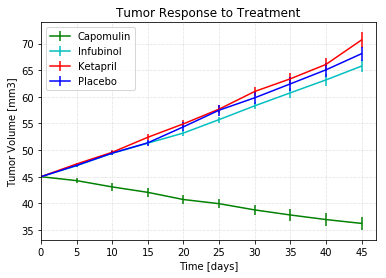

In [9]:
ax = plt.subplot(111)

xAxis = np.arange(0, 50, 5)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Tumor Volume [mm3]")

capLineV = ax.errorbar(xAxis, capList, yerr=caperrorList, fmt="g",
                   label="Capomulin")
infLineV = ax.errorbar(xAxis, infList, yerr=inferrorList, fmt="c",
                   label="Infubinol")
ketLineV = ax.errorbar(xAxis, ketList, yerr=keterrorList, fmt="r",
                   label="Ketapril")
plaLineV = ax.errorbar(xAxis, plaList, yerr=plaerrorList, fmt="b",
                   label="Placebo")

ax.set_xticks([value for value in xAxis], minor=False)

ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(xAxis)+2)

ax.legend(loc=2)

plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastaticDataDf = DataDF.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites" :["mean", "sem"]})
# Convert to DataFrame
capMetaList = metastaticDataDf.loc["Capomulin"].loc[:,"Metastatic Sites"].loc[:,"mean"].tolist()
infMetaList = metastaticDataDf.loc["Infubinol"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()
ketMetaList = metastaticDataDf.loc["Ketapril"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()
plaMetaList = metastaticDataDf.loc["Placebo"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()

capMetaerrorList = metastaticDataDf.loc["Capomulin"].loc[:,"Metastatic Sites"].loc[:,"sem"].tolist()
infMetaerrorList = metastaticDataDf.loc["Infubinol"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()
ketMetaerrorList = metastaticDataDf.loc["Ketapril"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()
plaMetaerrorList = metastaticDataDf.loc["Placebo"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()

# Preview DataFrame
metastaticDataDf


Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621
          25                0.818182  0.181818
          30                1.090909  0.172944
          35                1.181818  0.169496
          40                1.380952  0.175610
          45                1.476190  0.202591
Ceftamin  0                 0.000000  0.000000
          5                 0.380952  0.108588
          10                0.600000  0.152177
          15                0.789474  0.180625
          20                1.111111  0.241034
          25                1.500000  0.258831
          30                1.937500  0.249479
          35                2.071429  0.266526
          40                2.357143  0.289128
          45                2.692308  0.286101
Infubinol 0                 0.000000  0.000000
          5                 0.280000  0.091652
          10                0.666667  0.159364
          15                0.904762  0.194015
          20                1.050000  0.234801
          25                1.277778  0.265753
          30                1.588235  0.227823
          35                1.666667  0.224733
          40                2.100000  0.314466
          45                2.111111  0.309320
...                              ...       ...
Ramicane  0                 0.000000  0.000000
          5                 0.120000  0.066332
          10                0.250000  0.090289
          15                0.333333  0.115261
          20                0.347826  0.119430
          25                0.652174  0.119430
          30                0.782609  0.139968
          35                0.952381  0.145997
          40                1.100000  0.160591
          45                1.250000  0.190221
Stelasyn  0                 0.000000  0.000000
          5                 0.240000  0.087178
          10                0.478261  0.123672
          15                0.782609  0.153439
          20                0.952381  0.200905
          25                1.157895  0.219824
          30                1.388889  0.230641
          35                1.562500  0.240983
          40                1.583333  0.312815
          45                1.727273  0.359062
Zoniferol 0                 0.000000  0.000000
          5                 0.166667  0.077709
          10                0.500000  0.109109
          15                0.809524  0.111677
          20                1.294118  0.166378
          25                1.687500  0.236621
          30                1.933333  0.248168
          35                2.285714  0.285714
          40                2.785714  0.299791
          45                3.071429  0.286400

[100 rows x 2 columns]

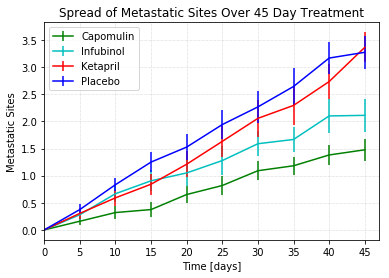

In [13]:
ax = plt.subplot(111)

xAxis = np.arange(0, 50, 5)

plt.title("Spread of Metastatic Sites Over 45 Day Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Metastatic Sites")

capLineMeta = ax.errorbar(xAxis, capMetaList, yerr=capMetaerrorList, fmt="g",
                   label="Capomulin")
infLineMeta = ax.errorbar(xAxis, infMetaList, yerr=infMetaerrorList, fmt="c",
                   label="Infubinol")
ketLineMeta = ax.errorbar(xAxis, ketMetaList, yerr=ketMetaerrorList, fmt="r",
                   label="Ketapril")
plaLineMeta = ax.errorbar(xAxis, plaMetaList, yerr=plaMetaerrorList, fmt="b",
                   label="Placebo")

ax.set_xticks([value for value in xAxis], minor=False)

ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(xAxis)+2)

ax.legend(loc=2)

plt.savefig("MetastaticSiteSpreadGraph.png")
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivalData = DataDF.groupby(["Drug", "Timepoint"])["Timepoint"].count()

capMice = survivalData.loc["Capomulin"].tolist()
infMice = survivalData.loc["Infubinol"].tolist()
ketMice = survivalData.loc["Ketapril"].tolist()
plaMice = survivalData.loc["Placebo"].tolist()

capSurvivalRate = np.divide(capMice, capMice[0])*100
infSurvivalRate = np.divide(infMice, infMice[0])*100
ketSurvivalRate = np.divide(ketMice, ketMice[0])*100
plaSurvivalRate = np.divide(plaMice, plaMice[0])*100


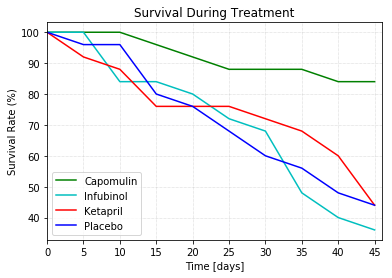

In [16]:
ax = plt.subplot(111)

xAxis = np.arange(0, 50, 5)

plt.title("Survival During Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Survival Rate (%)")

capLineS = ax.errorbar(xAxis, capSurvivalRate, fmt="g", label="Capomulin")
infLineS = ax.errorbar(xAxis, infSurvivalRate, fmt="c", label="Infubinol")
ketLineS = ax.errorbar(xAxis, ketSurvivalRate, fmt="r", label="Ketapril")
plaLineS = ax.errorbar(xAxis, plaSurvivalRate, fmt="b", label="Placebo")

ax.set_xticks([value for value in xAxis], minor=False)

ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(xAxis) + 1)

ax.legend(loc=3)

plt.savefig("MiceSurvivalRate.png")
plt.show()
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
capBar = int(np.divide((capList[-1] - capList[0]), capList[0])*100)
infBar = int(np.divide((infList[-1] - infList[0]), infList[0])*100)
ketBar = int(np.divide((ketList[-1] - ketList[0]), ketList[0])*100)
plaBar = int(np.divide((plaList[-1] - plaList[0]), plaList[0])*100)



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

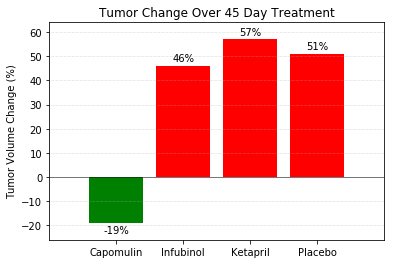

In [20]:
#create a bar graph for the tumor volume percent change data:

yAxis = [capBar, infBar, ketBar, plaBar]
xAxis = np.arange(len(yAxis))

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")

colors = []
for item in yAxis:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')
       
tumVolGraph = plt.bar(xAxis, yAxis, color=colors, alpha=1.0)

tickLoc = [value for value in xAxis]
plt.xticks(tickLoc, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)
plt.hlines(0, -1, len(xAxis), alpha = 1.0, linewidth=0.5)

plt.xlim(-1, len(xAxis))
plt.ylim(min(yAxis) - 7, max(yAxis) + 7)

def barLabel(rects):
    for i,rect in enumerate(rects):
        height = int(yAxis[i])
        if height > 0:
            plt.text(rect.get_x() + rect.get_width()/2., yAxis[i] + 1, "%s%%"% (yAxis[i]),
                ha="center", va="bottom", color="black")
        else:
            plt.text(rect.get_x() + rect.get_width()/2., yAxis[i] - 1, "%s%%"% (yAxis[i]),
                ha="center", va="top", color="black")          

barLabel(tumVolGraph)

plt.savefig("TumorBar.png")
plt.show()

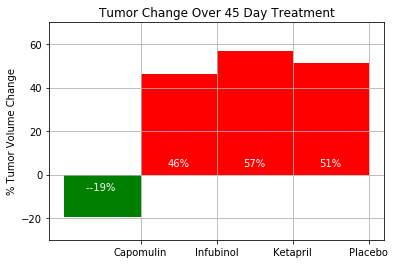